# Explore OURA API

## Configuration

In [1]:
from datetime import date
import requests
from dotenv import dotenv_values
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

In [2]:
sns.set_theme(style="white")

for font in font_manager.findSystemFonts("fonts/Manrope"):
    font_manager.fontManager.addfont(font)
plt.rc("font", family="Manrope", size=14)
plt.rc("xtick", labelsize="medium")
plt.rc("ytick", labelsize="medium")
plt.rc(
    "axes",
    titlesize="large",
    titlelocation="left",
    titlepad=10,
    labelsize="large",
)
plt.rc("axes.spines", top=False, right=False, bottom=True, left=True)
plt.rc("figure", titlesize="x-large", titleweight="extra bold")
plt.rc("figure.constrained_layout", use=True)
plt.rc("legend", fontsize="medium", title_fontsize="large", frameon=False)

In [3]:
OURA_ACCESS_TOKEN = dotenv_values()["OURA_ACCESS_TOKEN"]

In [4]:
OURA_API_URL = "https://api.ouraring.com/v2/usercollection/{endpoint}"

## Fetch data

In [5]:
url = OURA_API_URL.format(endpoint="daily_readiness")
headers = {"Authorization": f"Bearer {OURA_ACCESS_TOKEN}"}
params = {
    "start_date": date(date.today().year - 1, 1, 1).isoformat(),
    "end_date": date.today().isoformat(),
}
response = requests.get(url, params, headers=headers)

In [6]:
daily_readiness = pd.json_normalize(response.json()["data"])
daily_readiness.set_index("id", inplace=True)
daily_readiness["day"] = pd.to_datetime(
    daily_readiness["day"]).dt.to_period("D")
daily_readiness["timestamp"] = pd.to_datetime(
    daily_readiness["timestamp"], utc=True)
daily_readiness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 9accdec6-a27e-43c1-afe2-32f66ab65e6a to 356016a8-2068-48e6-843b-9f704773a513
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   day                                 139 non-null    period[D]          
 1   score                               139 non-null    int64              
 2   temperature_deviation               138 non-null    float64            
 3   temperature_trend_deviation         137 non-null    float64            
 4   timestamp                           139 non-null    datetime64[ns, UTC]
 5   contributors.activity_balance       128 non-null    float64            
 6   contributors.body_temperature       138 non-null    float64            
 7   contributors.hrv_balance            133 non-null    float64            
 8   contributors.previous_day_activity  128 non-null    float

In [7]:
url = OURA_API_URL.format(endpoint="daily_sleep")
headers = {"Authorization": f"Bearer {OURA_ACCESS_TOKEN}"}
params = {
    "start_date": date(date.today().year - 1, 1, 1).isoformat(),
    "end_date": date.today().isoformat(),
}
response = requests.get(url, params, headers=headers)

In [8]:
daily_sleep = pd.json_normalize(response.json()["data"])
daily_sleep.set_index("id", inplace=True)
daily_sleep["day"] = pd.to_datetime(daily_sleep["day"]).dt.to_period("D")
daily_sleep["timestamp"] = pd.to_datetime(daily_sleep["timestamp"], utc=True)
daily_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 88473e7b-abeb-4901-af7d-6e93b2ecc40e to 70ba4906-05a6-4e1b-904a-d6dc21d03ef2
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   day                       139 non-null    period[D]          
 1   score                     139 non-null    int64              
 2   timestamp                 139 non-null    datetime64[ns, UTC]
 3   contributors.deep_sleep   139 non-null    int64              
 4   contributors.efficiency   139 non-null    int64              
 5   contributors.latency      139 non-null    int64              
 6   contributors.rem_sleep    139 non-null    int64              
 7   contributors.restfulness  139 non-null    int64              
 8   contributors.timing       139 non-null    int64              
 9   contributors.total_sleep  139 non-null    int64              
dtypes: datetime64[ns, UTC](

In [9]:
url = OURA_API_URL.format(endpoint="daily_activity")
headers = {"Authorization": f"Bearer {OURA_ACCESS_TOKEN}"}
params = {
    "start_date": date(date.today().year - 1, 1, 1).isoformat(),
    "end_date": date.today().isoformat(),
}
response = requests.get(url, params, headers=headers)

In [10]:
daily_activity = pd.json_normalize(response.json()["data"])
daily_activity.set_index("id", inplace=True)
daily_activity["day"] = pd.to_datetime(daily_activity["day"]).dt.to_period("D")
daily_activity["timestamp"] = pd.to_datetime(
    daily_activity["timestamp"], utc=True)
samples_columns = ["class_5_min", "met.interval", "met.items", "met.timestamp"]
daily_activity["met.timestamp"] = pd.to_datetime(
    daily_activity["met.timestamp"], utc=True
)
daily_activity["score"] = daily_activity["score"].where(daily_activity["score"] > 0)
daily_activity_samples = daily_activity[samples_columns].copy()
daily_activity.drop(columns=samples_columns, inplace=True)
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 6950c724-9f7f-4784-8b66-8343970a12ef to 686d121d-8440-4a7b-8233-888548d0fba5
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   score                            133 non-null    float64            
 1   active_calories                  145 non-null    int64              
 2   average_met_minutes              145 non-null    float64            
 3   equivalent_walking_distance      145 non-null    int64              
 4   high_activity_met_minutes        145 non-null    int64              
 5   high_activity_time               145 non-null    int64              
 6   inactivity_alerts                145 non-null    int64              
 7   low_activity_met_minutes         145 non-null    int64              
 8   low_activity_time                145 non-null    int64              
 9   medium_activi

In [11]:
url = OURA_API_URL.format(endpoint="sleep")
headers = {"Authorization": f"Bearer {OURA_ACCESS_TOKEN}"}
params = {
    "start_date": date(date.today().year - 1, 1, 1).isoformat(),
    "end_date": date.today().isoformat(),
}
response = requests.get(url, params, headers=headers)

In [12]:
sleep = pd.json_normalize(response.json()["data"])
sleep.set_index("id", inplace=True)
sleep["day"] = pd.to_datetime(sleep["day"]).dt.to_period("D")
sleep["bedtime_start"] = pd.to_datetime(sleep["bedtime_start"], utc=True)
sleep["bedtime_end"] = pd.to_datetime(sleep["bedtime_end"], utc=True)
sleep["hrv.timestamp"] = pd.to_datetime(sleep["hrv.timestamp"], utc=True)
sleep["heart_rate.timestamp"] = pd.to_datetime(sleep["heart_rate.timestamp"], utc=True)
samples_columns = [
    "movement_30_sec",
    "sleep_phase_5_min",
    "hrv.timestamp",
    "hrv.interval",
    "hrv.items",
    "heart_rate.timestamp",
    "heart_rate.interval",
    "heart_rate.items",
]
sleep_samples = sleep[samples_columns].copy()
sleep.drop(columns=samples_columns + ["hrv", "heart_rate"], inplace=True)
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 60de1520-a18a-46f5-91c0-3e176586eb75 to c0ffbcc3-661e-4fa7-8516-73c8ee855995
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype              
---  ------                                        --------------  -----              
 0   average_breath                                168 non-null    float64            
 1   average_heart_rate                            168 non-null    float64            
 2   average_hrv                                   145 non-null    float64            
 3   awake_time                                    168 non-null    int64              
 4   bedtime_end                                   168 non-null    datetime64[ns, UTC]
 5   bedtime_start                                 168 non-null    datetime64[ns, UTC]
 6   day                                           168 non-null    period[D]          
 7   deep_sleep_duration                         

## Main score trends

Text(0.054828499999999995, 0.98, 'Readiness, Sleep and Activity Scores')

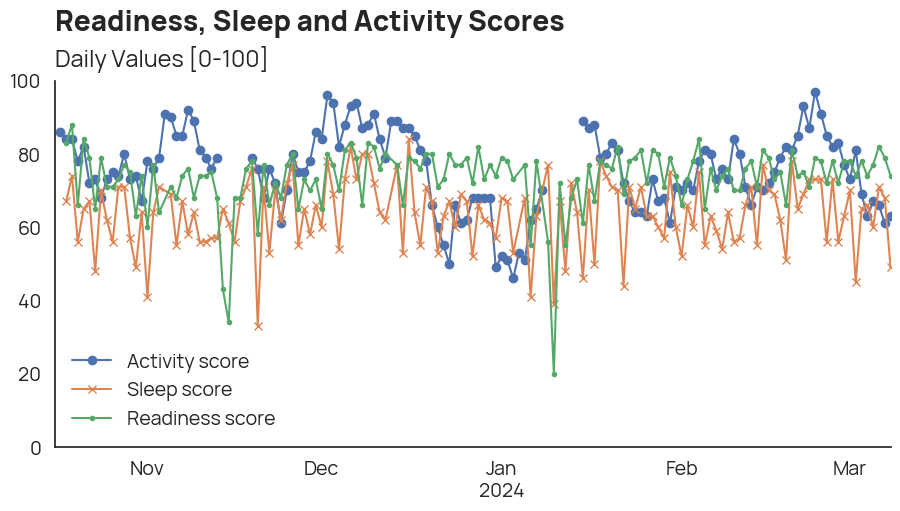

In [13]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
daily_activity.plot(x="day", y="score", marker="o",
                    ax=ax, label="Activity score")
daily_sleep.plot(x="day", y="score", marker="x", ax=ax, label="Sleep score")
daily_readiness.plot(x="day", y="score", marker=".",
                     ax=ax, label="Readiness score")
ax.set_xlabel("")
ax.set_title("Daily Values [0-100]", loc="left", size="large")
ax.set_ylim(0, 100)
fig.canvas.draw()
fig.suptitle(
    "Readiness, Sleep and Activity Scores",
    x=ax.get_position().x0,
    ha="left",
)

In [14]:
daily_readiness["score_7DMA"] = daily_readiness.rolling("7D", on="day", min_periods=3)[
    "score"
].mean()
daily_sleep["score_7DMA"] = daily_sleep.rolling("7D", on="day", min_periods=3)[
    "score"
].mean()
daily_activity["score_7DMA"] = daily_activity.rolling("7D", on="day", min_periods=3)[
    "score"
].mean()

Text(0.054828499999999995, 0.98, 'Readiness, Sleep and Activity Scores')

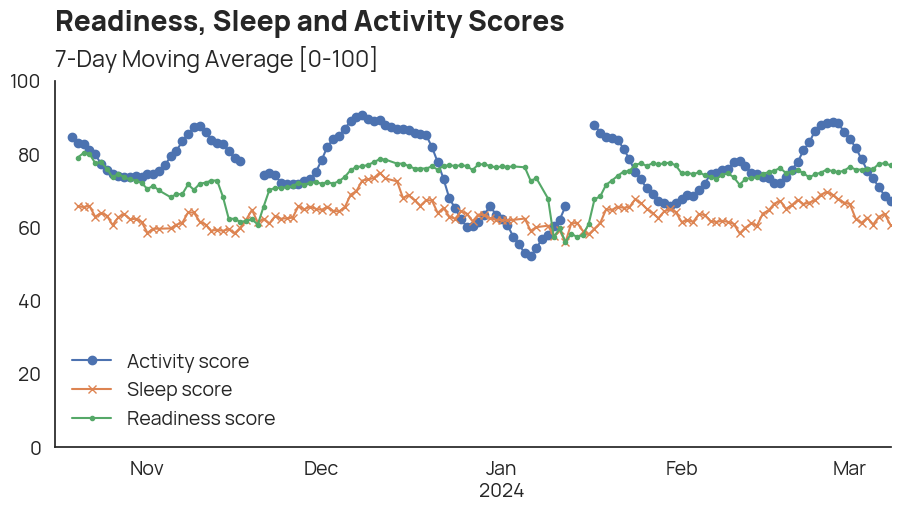

In [15]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
daily_activity.plot(x="day", y="score_7DMA", marker="o",
                    ax=ax, label="Activity score")
daily_sleep.plot(x="day", y="score_7DMA", marker="x",
                 ax=ax, label="Sleep score")
daily_readiness.plot(
    x="day", y="score_7DMA", marker=".", ax=ax, label="Readiness score"
)
ax.set_xlabel("")
ax.set_title("7-Day Moving Average [0-100]", loc="left", size="large")
ax.set_ylim(0, 100)
fig.canvas.draw()
fig.suptitle(
    "Readiness, Sleep and Activity Scores",
    x=ax.get_position().x0,
    ha="left",
)

## Correlation between main scores

Text(0.0869535, 0.98, 'Readiness vs Sleep Scores')

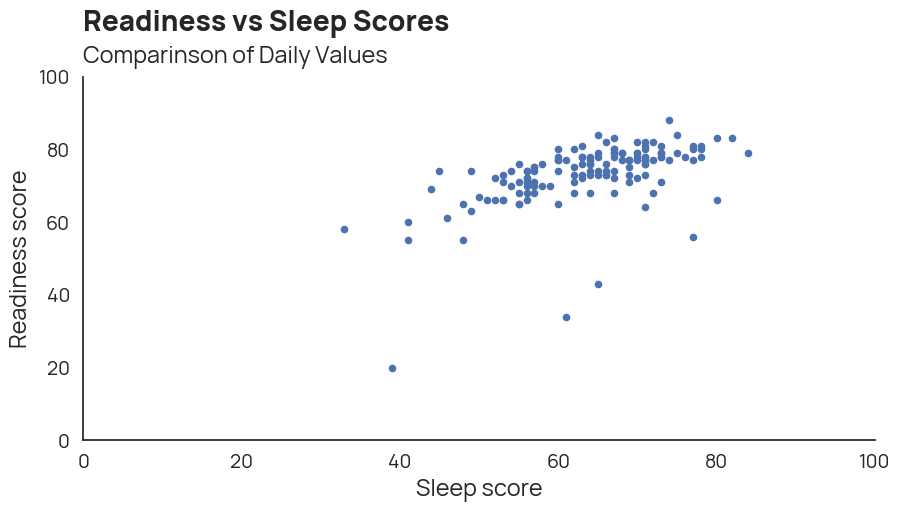

In [16]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
daily_readiness[["day", "score"]].join(
    daily_sleep[["day", "score"]].set_index("day"),
    on="day",
    lsuffix="_readiness",
    rsuffix="_sleep",
).plot(kind="scatter", x="score_sleep", y="score_readiness", ax=ax)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xlabel("Sleep score")
ax.set_ylabel("Readiness score")
ax.set_title("Comparinson of Daily Values")
fig.canvas.draw()
fig.suptitle("Readiness vs Sleep Scores", x=ax.get_position().x0, ha="left")

In [17]:
# Correlation between daily readiness and sleep scores
daily_readiness_sleep = daily_readiness[["day", "score"]].join(
    daily_sleep[["day", "score"]].set_index("day"), on="day", lsuffix="_readiness", rsuffix="_sleep"
)
daily_readiness_sleep[['score_readiness', 'score_sleep']].corr()

,score_readiness,score_sleep
score_readiness,1.000000,0.554291
score_sleep,0.554291,1.000000


Text(0.0869535, 0.98, 'Readiness vs Activity Scores')

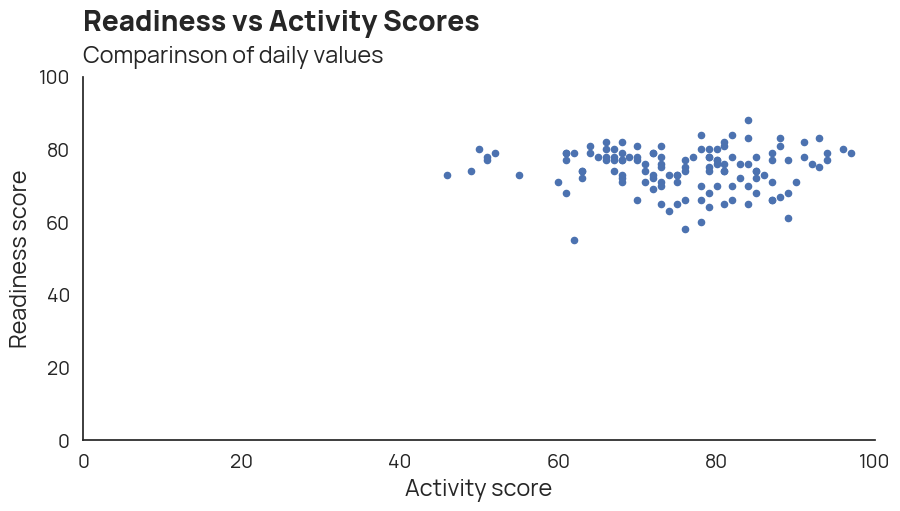

In [18]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
daily_readiness[["day", "score"]].join(
    daily_activity[["day", "score"]].set_index("day"),
    on="day",
    lsuffix="_readiness",
    rsuffix="_activity",
).plot(kind="scatter", x="score_activity", y="score_readiness", ax=ax)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xlabel("Activity score")
ax.set_ylabel("Readiness score")
ax.set_title("Comparinson of daily values")
fig.canvas.draw()
fig.suptitle("Readiness vs Activity Scores", x=ax.get_position().x0, ha="left")

In [19]:
# Correlation between daily readiness and activity scores
daily_readiness_activity = daily_readiness[["day", "score"]].join(
    daily_activity[["day", "score"]].set_index("day"), on="day", lsuffix="_readiness", rsuffix="_activity"
)
daily_readiness_activity[['score_readiness', 'score_activity']].corr()

,score_readiness,score_activity
score_readiness,1.00000,-0.02898
score_activity,-0.02898,1.00000


## Share of fair, good, and optimal days, rolling window

In [20]:
OURA_SCORES_GROUP = {
    "Pay attention": (0, 50),
    "Fair": (50, 70),
    "Good": (70, 85),
    "Optimal": (85, 100),
}


def score_group(score):
    for group, (min_score, max_score) in OURA_SCORES_GROUP.items():
        if min_score <= score < max_score:
            return group
    raise ValueError(f"Score {score} is out of range")


score_group_type = pd.CategoricalDtype(
    categories=OURA_SCORES_GROUP.keys(), ordered=True
)

In [21]:
daily_readiness = daily_readiness.join(
    pd.get_dummies(daily_readiness["score"].map(score_group).astype(score_group_type))
)
daily_readiness

,day,score,temperature_deviation,temperature_trend_deviation,timestamp,contributors.activity_balance,contributors.body_temperature,contributors.hrv_balance,contributors.previous_day_activity,contributors.previous_night,contributors.recovery_index,contributors.resting_heart_rate,contributors.sleep_balance,score_7DMA,Pay attention,Fair,Good,Optimal
id,,,,,,,,,,,,,,,,,,
9accdec6-a27e-43c1-afe2-32f66ab65e6a,2023-10-18,83,-0.06,NaN,2023-10-18 00:00:00+00:00,85.0,100.0,NaN,84.0,70,84,92,NaN,NaN,False,False,True,False
6402265a-c2fb-469e-8618-6ae99e01df6f,2023-10-19,88,-0.11,-0.02,2023-10-19 00:00:00+00:00,81.0,100.0,NaN,85.0,78,100,98,NaN,NaN,False,False,False,True
f31d09f7-704c-4565-b3e5-d3a5445f04cb,2023-10-20,66,0.25,0.06,2023-10-20 00:00:00+00:00,74.0,86.0,NaN,74.0,53,51,78,NaN,79.000000,False,True,False,False
6d1a7020-a7f2-4d79-87d4-9636f2986f08,2023-10-21,84,0.08,0.12,2023-10-21 00:00:00+00:00,79.0,99.0,NaN,86.0,66,100,100,75.0,80.250000,False,False,True,False
ce76356e-fc04-4860-a822-5b2669a45c3a,2023-10-22,79,-0.12,0.08,2023-10-22 00:00:00+00:00,73.0,100.0,NaN,85.0,69,100,96,65.0,80.000000,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337fca50-6df9-4384-81eb-6d2498be1ac6,2024-03-04,74,0.19,-0.06,2024-03-04 00:00:00+00:00,82.0,90.0,85.0,79.0,68,77,77,53.0,76.000000,False,False,True,False
8b23e229-aa02-48d5-a0ae-0aa88f3ac454,2024-03-05,77,0.05,0.03,2024-03-05 00:00:00+00:00,86.0,100.0,89.0,70.0,60,94,92,54.0,75.857143,False,False,True,False
2261835d-bbe6-4f47-bd8c-dc85630377ac,2024-03-06,82,0.03,0.10,2024-03-06 00:00:00+00:00,90.0,100.0,88.0,86.0,74,91,100,55.0,77.285714,False,False,True,False


In [22]:
group_columns = score_group_type.categories.tolist()
group_columns

['Pay attention', 'Fair', 'Good', 'Optimal']

In [23]:
readiness_rolling_counts = (
    daily_readiness.rolling("30D", on="day", min_periods=10)[group_columns]
    .sum()
    .set_index("day")
)
readiness_rolling_counts

,Fair,Good,Optimal,Pay attention
day,,,,
2023-10-18,NaN,NaN,NaN,NaN
2023-10-19,NaN,NaN,NaN,NaN
2023-10-20,NaN,NaN,NaN,NaN
2023-10-21,NaN,NaN,NaN,NaN
2023-10-22,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-03-04,2.0,28.0,0.0,0.0
2024-03-05,2.0,28.0,0.0,0.0
2024-03-06,1.0,29.0,0.0,0.0


In [24]:
readines_rolling_shares = readiness_rolling_counts.div(
    readiness_rolling_counts.sum(axis=1), axis=0
)
readines_rolling_shares

,Fair,Good,Optimal,Pay attention
day,,,,
2023-10-18,NaN,NaN,NaN,NaN
2023-10-19,NaN,NaN,NaN,NaN
2023-10-20,NaN,NaN,NaN,NaN
2023-10-21,NaN,NaN,NaN,NaN
2023-10-22,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-03-04,0.066667,0.933333,0.0,0.0
2024-03-05,0.066667,0.933333,0.0,0.0
2024-03-06,0.033333,0.966667,0.0,0.0


In [25]:
readines_rolling_shares.columns = readines_rolling_shares.columns.astype(score_group_type)
readines_rolling_shares.sort_index(axis=1, inplace=True)
readines_rolling_shares

,Pay attention,Fair,Good,Optimal
day,,,,
2023-10-18,NaN,NaN,NaN,NaN
2023-10-19,NaN,NaN,NaN,NaN
2023-10-20,NaN,NaN,NaN,NaN
2023-10-21,NaN,NaN,NaN,NaN
2023-10-22,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-03-04,0.0,0.066667,0.933333,0.0
2024-03-05,0.0,0.066667,0.933333,0.0
2024-03-06,0.0,0.033333,0.966667,0.0


Text(0.07437537499999998, 0.98, 'Readiness Score')

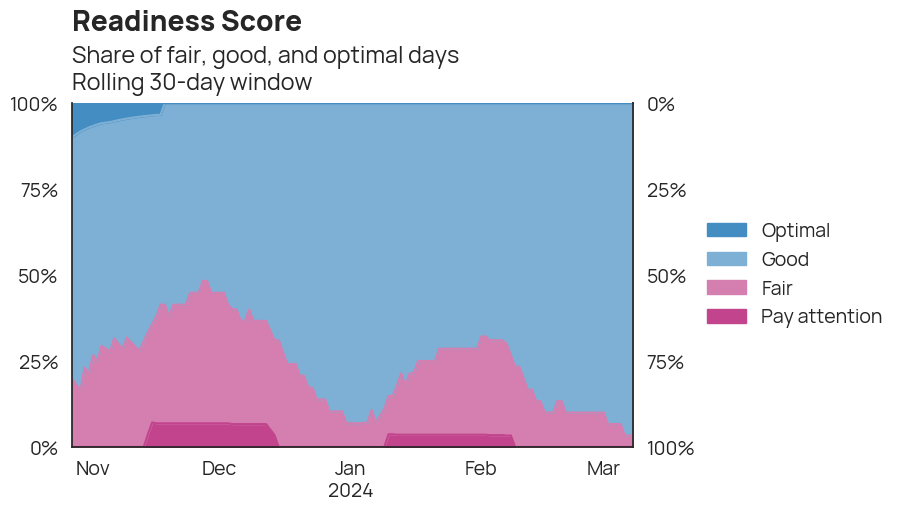

In [26]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
readines_rolling_shares.dropna().plot.area(
    ax=ax,
    title="Share of fair, good, and optimal days\nRolling 30-day window",
    xlabel="",
    legend=False,
    color=["#C2448D", "#D57EB0", "#7EB0D5", "#448DC2"],
)
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1], labels=["0%", "25%", "50%", "75%", "100%"])
ax2 = ax.secondary_yaxis("right", functions=(lambda x: 1 - x, lambda x: 1 - x))
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1], labels=["0%", "25%", "50%", "75%", "100%"])
ax2.tick_params(axis="y", right=False)
ax.spines["right"].set_visible(True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles[::-1],
    labels=labels[::-1],
    loc="center left",
    bbox_to_anchor=(1.1, 0.5),
)
fig.canvas.draw()
fig.suptitle("Readiness Score", x=ax.get_position().x0, ha="left")

In [27]:
daily_sleep = daily_sleep.join(
    pd.get_dummies(daily_sleep["score"].map(score_group).astype(score_group_type))
)
daily_sleep

,day,score,timestamp,contributors.deep_sleep,contributors.efficiency,contributors.latency,contributors.rem_sleep,contributors.restfulness,contributors.timing,contributors.total_sleep,score_7DMA,Pay attention,Fair,Good,Optimal
id,,,,,,,,,,,,,,,
88473e7b-abeb-4901-af7d-6e93b2ecc40e,2023-10-18,67,2023-10-18 00:00:00+00:00,81,90,94,64,51,60,58,NaN,False,True,False,False
98015bc3-5d02-473d-863a-1b79908776cf,2023-10-19,74,2023-10-19 00:00:00+00:00,97,76,67,73,51,85,77,NaN,False,False,True,False
cc1a983e-3483-4f7e-b749-769291212668,2023-10-20,56,2023-10-20 00:00:00+00:00,67,74,83,46,45,48,50,65.666667,False,True,False,False
5517a1c4-37e7-4885-9dd9-a20b1c3759d7,2023-10-21,65,2023-10-21 00:00:00+00:00,95,90,72,50,46,21,72,65.500000,False,True,False,False
d4648580-86d6-4b3a-ab8c-07659f46ff09,2023-10-22,67,2023-10-22 00:00:00+00:00,96,65,81,45,67,33,69,65.800000,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4b5b2ae1-69e2-4eae-8e2d-6234416658dc,2024-03-04,66,2024-03-04 00:00:00+00:00,81,86,89,63,56,73,52,62.571429,False,True,False,False
f4e3472c-2b72-433c-b218-b00bf19cb5be,2024-03-05,60,2024-03-05 00:00:00+00:00,88,65,72,54,54,52,53,60.714286,False,True,False,False
e97cb4ee-54d0-4343-8c45-3a2897ff0a8c,2024-03-06,71,2024-03-06 00:00:00+00:00,96,93,78,76,51,77,62,62.857143,False,False,True,False


In [28]:
sleep_rolling_counts = (
    daily_sleep.rolling("30D", on="day", min_periods=10)[group_columns]
    .sum()
    .set_index("day")
)
sleep_rolling_counts

,Fair,Good,Optimal,Pay attention
day,,,,
2023-10-18,NaN,NaN,NaN,NaN
2023-10-19,NaN,NaN,NaN,NaN
2023-10-20,NaN,NaN,NaN,NaN
2023-10-21,NaN,NaN,NaN,NaN
2023-10-22,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-03-04,19.0,10.0,0.0,1.0
2024-03-05,20.0,9.0,0.0,1.0
2024-03-06,19.0,10.0,0.0,1.0


In [29]:
sleep_rolling_shares = sleep_rolling_counts.div(
    sleep_rolling_counts.sum(axis=1), axis=0
)
sleep_rolling_shares.columns = sleep_rolling_shares.columns.astype(score_group_type)
sleep_rolling_shares.sort_index(axis=1, inplace=True)
sleep_rolling_shares

,Pay attention,Fair,Good,Optimal
day,,,,
2023-10-18,NaN,NaN,NaN,NaN
2023-10-19,NaN,NaN,NaN,NaN
2023-10-20,NaN,NaN,NaN,NaN
2023-10-21,NaN,NaN,NaN,NaN
2023-10-22,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-03-04,0.033333,0.633333,0.333333,0.0
2024-03-05,0.033333,0.666667,0.300000,0.0
2024-03-06,0.033333,0.633333,0.333333,0.0


Text(0.07437537499999998, 0.98, 'Sleep Score')

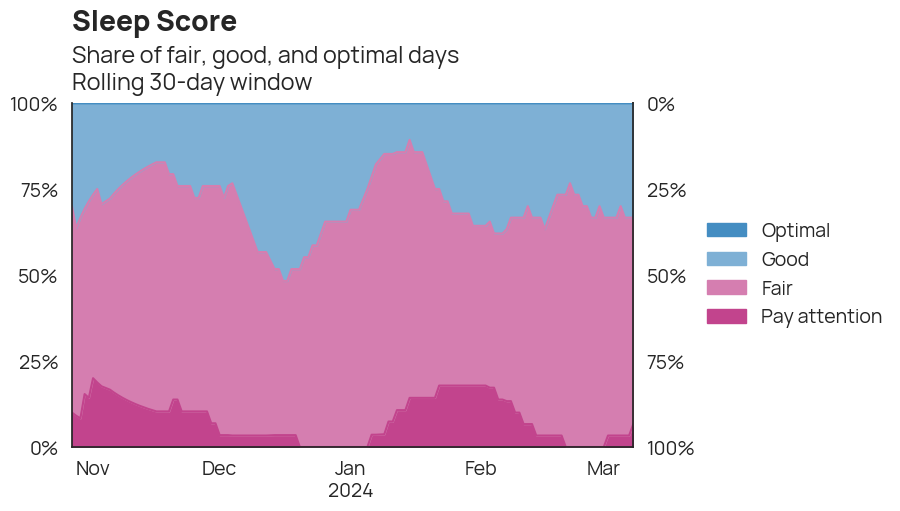

In [30]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
sleep_rolling_shares.dropna().plot.area(
    ax=ax,
    title="Share of fair, good, and optimal days\nRolling 30-day window",
    xlabel="",
    legend=False,
    color=["#C2448D", "#D57EB0", "#7EB0D5", "#448DC2"],
)
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1], labels=["0%", "25%", "50%", "75%", "100%"])
ax2 = ax.secondary_yaxis("right", functions=(lambda x: 1 - x, lambda x: 1 - x))
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1], labels=["0%", "25%", "50%", "75%", "100%"])
ax2.tick_params(axis="y", right=False)
ax.spines["right"].set_visible(True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles[::-1],
    labels=labels[::-1],
    loc="center left",
    bbox_to_anchor=(1.1, 0.5),
)
fig.canvas.draw()
fig.suptitle("Sleep Score", x=ax.get_position().x0, ha="left")

In [31]:
daily_activity = daily_activity.join(
    pd.get_dummies(
        daily_activity["score"]
        .map(score_group, na_action="ignore")
        .astype(score_group_type)
    )
)
daily_activity

,score,active_calories,average_met_minutes,equivalent_walking_distance,high_activity_met_minutes,high_activity_time,inactivity_alerts,low_activity_met_minutes,low_activity_time,medium_activity_met_minutes,...,contributors.move_every_hour,contributors.recovery_time,contributors.stay_active,contributors.training_frequency,contributors.training_volume,score_7DMA,Pay attention,Fair,Good,Optimal
id,,,,,,,,,,,,,,,,,,,,,
6950c724-9f7f-4784-8b66-8343970a12ef,NaN,0,1.18750,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
4c26af1d-4e60-4867-8819-8b6c2cbd38ba,86.0,208,1.34375,4068,0,0,3,76,6960,99,...,60.0,100.0,74.0,100.0,97.0,NaN,False,False,False,True
94ea4947-8dd4-4971-ba36-00e7bd08d057,84.0,427,1.43750,8291,0,0,2,123,11820,236,...,78.0,100.0,78.0,100.0,97.0,NaN,False,False,True,False
5487d2d3-ff64-43ee-a77e-0f3782160e06,84.0,601,1.59375,12093,38,300,1,215,15300,255,...,95.0,100.0,67.0,100.0,98.0,84.666667,False,False,True,False
baf89b8e-5356-41a1-8d0b-a5ca9032510d,78.0,179,1.34375,3085,0,0,3,97,11520,49,...,60.0,100.0,48.0,100.0,97.0,83.000000,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1d4459b1-f756-4e0f-83c7-31c5a585f3bb,63.0,422,1.50000,7569,8,60,2,89,9540,248,...,78.0,100.0,42.0,100.0,96.0,75.428571,False,True,False,False
5eb6d515-05ed-4cd5-b4e3-3db35387102d,67.0,226,1.34375,3950,7,60,1,124,11820,50,...,95.0,100.0,56.0,100.0,96.0,73.285714,False,True,False,False
89bc60a5-4eca-4264-8add-4bfd887adf19,66.0,340,1.43750,6135,7,60,0,90,10140,182,...,100.0,100.0,47.0,100.0,96.0,70.857143,False,True,False,False


In [32]:
activity_rolling_counts = (
    daily_activity.rolling("30D", on="day", min_periods=10)[group_columns]
    .sum()
    .set_index("day")
)
activity_rolling_counts.columns = activity_rolling_counts.columns.astype(score_group_type)
activity_rolling_counts.sort_index(axis=1, inplace=True)
activity_rolling_counts

,Pay attention,Fair,Good,Optimal
day,,,,
2023-10-16,NaN,NaN,NaN,NaN
2023-10-17,NaN,NaN,NaN,NaN
2023-10-18,NaN,NaN,NaN,NaN
2023-10-19,NaN,NaN,NaN,NaN
2023-10-20,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-03-04,0.0,3.0,21.0,6.0
2024-03-05,0.0,4.0,20.0,6.0
2024-03-06,0.0,5.0,19.0,6.0


In [33]:
activity_rolling_shares = activity_rolling_counts.div(
    activity_rolling_counts.sum(axis=1), axis=0
)
activity_rolling_shares

,Pay attention,Fair,Good,Optimal
day,,,,
2023-10-16,NaN,NaN,NaN,NaN
2023-10-17,NaN,NaN,NaN,NaN
2023-10-18,NaN,NaN,NaN,NaN
2023-10-19,NaN,NaN,NaN,NaN
2023-10-20,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-03-04,0.0,0.100000,0.700000,0.2
2024-03-05,0.0,0.133333,0.666667,0.2
2024-03-06,0.0,0.166667,0.633333,0.2


Text(0.07437537499999998, 0.98, 'Activity Score')

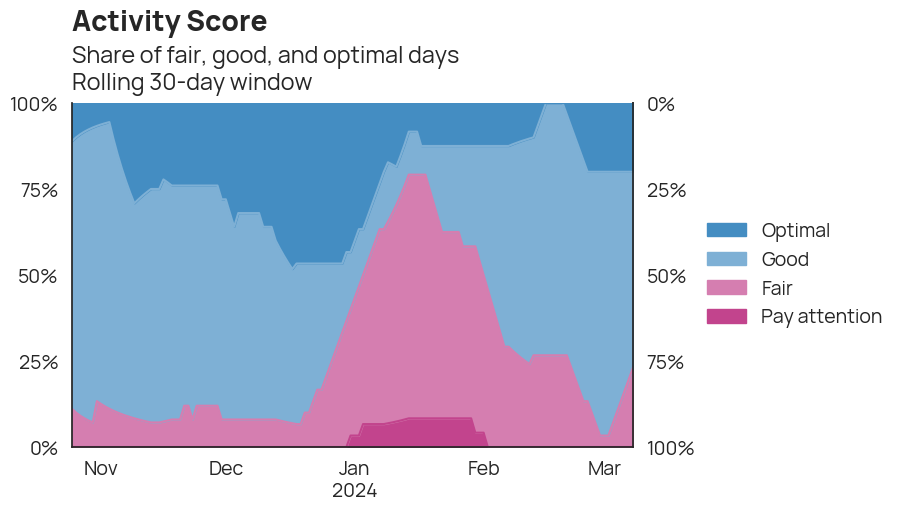

In [34]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
activity_rolling_shares.dropna().plot.area(
    ax=ax,
    title="Share of fair, good, and optimal days\nRolling 30-day window",
    xlabel="",
    legend=False,
    color=["#C2448D", "#D57EB0", "#7EB0D5", "#448DC2"],
)
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1], labels=["0%", "25%", "50%", "75%", "100%"])
ax2 = ax.secondary_yaxis("right", functions=(lambda x: 1 - x, lambda x: 1 - x))
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1], labels=["0%", "25%", "50%", "75%", "100%"])
ax2.tick_params(axis="y", right=False)
ax.spines["right"].set_visible(True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles[::-1],
    labels=labels[::-1],
    loc="center left",
    bbox_to_anchor=(1.1, 0.5),
)
fig.canvas.draw()
fig.suptitle("Activity Score", x=ax.get_position().x0, ha="left")